In [2]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [13]:
with open('./fetch_models/FetchSlide-v1_no_explore.wts','rb') as f:
    data_no_explore = pickle.load(f)
with open('./fetch_models/FetchSlide-v1_ou.wts','rb') as f:
    data_ou = pickle.load(f)
with open('./fetch_models/FetchSlide-v1_e_greedy.wts','rb') as f:
    data_e_greedy = pickle.load(f)
with open('./fetch_models/FetchSlide-v1_parameter_noise.wts','rb') as f:
    data_parameter_noise = pickle.load(f)
with open('./fetch_models/FetchSlide-v1_e_greedy_decay.wts','rb') as f:
    data_e_greedy_decay = pickle.load(f)
with open('./fetch_models/FetchSlide-v1_count.wts','rb') as f:
    data_count = pickle.load(f)
with open('./fetch_models/FetchSlide-v1_ucb.wts','rb') as f:
    data_ucb = pickle.load(f)
with open('./fetch_models/FetchSlide-v1_standard.wts','rb') as f:
    data_standard = pickle.load(f)

In [9]:
### Helper functions
def rolling_average(data,window_size):
    """Smoothen the 1-d data array using a rollin average.

    Args:
        data: 1-d numpy.array
        window_size: size of the smoothing window

    Returns:
        smooth_data: a 1-d numpy.array with the same size as data
    """
    assert data.ndim == 1
    kernel = np.ones(window_size)
    smooth_data = np.convolve(data, kernel) / np.convolve(
        np.ones_like(data), kernel
    )
    return smooth_data[: -window_size + 1]

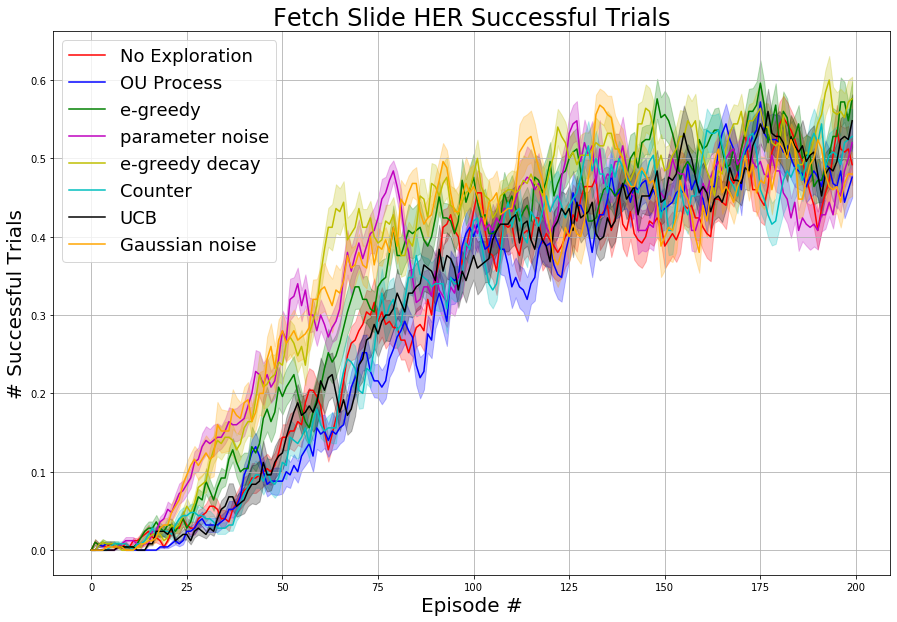

In [16]:
plt.rcParams['figure.figsize'] = [15, 10]
# No exploration
t_data = np.array(data_no_explore[0])
means = rolling_average(np.mean(t_data, axis=0),5)
row_error = rolling_average(np.std(t_data, axis=0) / np.sqrt(100),5)
plt.fill_between(range(200), means + 1.96*row_error, means - 1.96*row_error, alpha=0.25, color='r')
plt.plot(means, 'r', label='No Exploration')
# OU Process
t_data = np.array(data_ou[0])
means = rolling_average(np.mean(t_data, axis=0),5)
row_error = rolling_average(np.std(t_data, axis=0) / np.sqrt(100),5)
plt.fill_between(range(200), means + 1.96*row_error, means - 1.96*row_error, alpha=0.25, color='b')
plt.plot(means, 'b', label='OU Process')
# e-greedy
t_data = np.array(data_e_greedy[0])
means = rolling_average(np.mean(t_data, axis=0),5)
row_error = rolling_average(np.std(t_data, axis=0) / np.sqrt(100),5)
plt.fill_between(range(200), means + 1.96*row_error, means - 1.96*row_error, alpha=0.25, color='g')
plt.plot(means, 'g', label='e-greedy')
# parameter space
t_data = np.array(data_parameter_noise[0])
means = rolling_average(np.mean(t_data, axis=0),5)
row_error = rolling_average(np.std(t_data, axis=0) / np.sqrt(100),5)
plt.fill_between(range(200), means + 1.96*row_error, means - 1.96*row_error, alpha=0.25, color='m')
plt.plot(means, 'm', label='parameter noise')
# e-greedy decay
t_data = np.array(data_e_greedy_decay[0])
means = rolling_average(np.mean(t_data, axis=0),5)
row_error = rolling_average(np.std(t_data, axis=0) / np.sqrt(100),5)
plt.fill_between(range(200), means + 1.96*row_error, means - 1.96*row_error, alpha=0.25, color='y')
plt.plot(means, 'y', label='e-greedy decay')
# counter based
t_data = np.array(data_count[0])
means = rolling_average(np.mean(t_data, axis=0),5)
row_error = rolling_average(np.std(t_data, axis=0) / np.sqrt(100),5)
plt.fill_between(range(200), means + 1.96*row_error, means - 1.96*row_error, alpha=0.25, color='c')
plt.plot(means, 'c', label='Counter')
# ucb
t_data = np.array(data_ucb[0])
means = rolling_average(np.mean(t_data, axis=0),5)
row_error = rolling_average(np.std(t_data, axis=0) / np.sqrt(100),5)
plt.fill_between(range(200), means + 1.96*row_error, means - 1.96*row_error, alpha=0.25, color='k')
plt.plot(means, 'k', label='UCB')
# Gaussian noise
t_data = np.array(data_standard[0])
means = rolling_average(np.mean(t_data, axis=0),5)
row_error = rolling_average(np.std(t_data, axis=0) / np.sqrt(100),5)
plt.fill_between(range(200), means + 1.96*row_error, means - 1.96*row_error, alpha=0.25, color='#FFA500')
plt.plot(means, '#FFA500', label='Gaussian noise')
# Main display
plt.xlabel('Episode #',fontsize='20')
plt.ylabel('# Successful Trials', fontsize='20')
plt.title('Fetch Slide HER Successful Trials', fontsize='24')
plt.grid()
plt.legend(prop={'size': 18})
plt.show()

In [24]:
from schedule import OUSchedule

s = OUSchedule(1000,4)
vals = [] 
for x in range(1000):
    vals.append(s.value(x))
vals = np.array(vals)

No handles with labels found to put in legend.


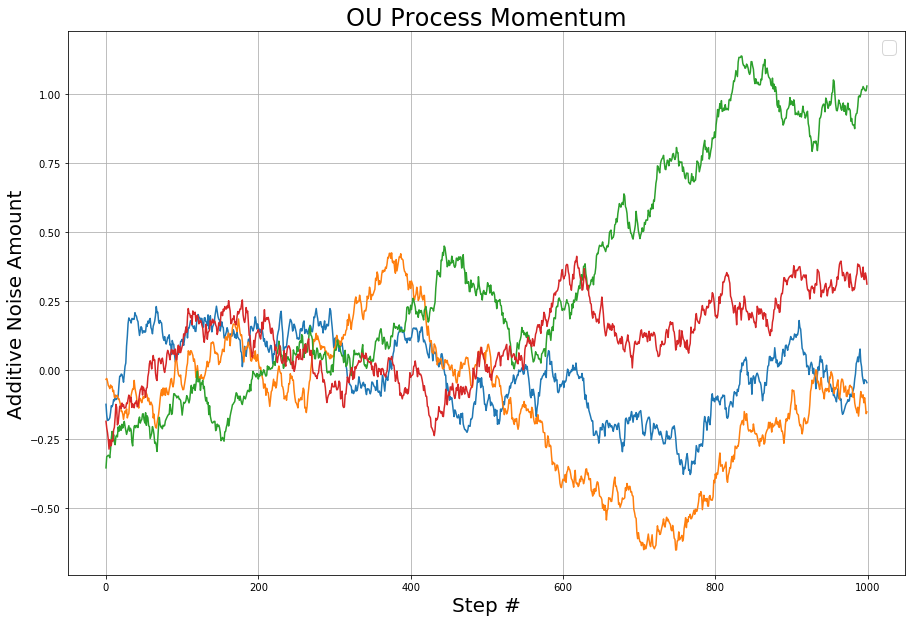

In [27]:
#
plt.plot(range(1000), vals[:,0])
plt.plot(range(1000), vals[:,1])
plt.plot(range(1000), vals[:,2])
plt.plot(range(1000), vals[:,3])
# Main display
plt.xlabel('Step #',fontsize='20')
plt.ylabel('Additive Noise Amount', fontsize='20')
plt.title('OU Process Momentum', fontsize='24')
plt.grid()
plt.legend(prop={'size': 18})
plt.show()

In [28]:
!pip install torchviz

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 46 kB 4.2 MB/s             
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4150 sha256=b660adf94ddce7b04cf7f394019688557f26a4bcdbf7773b3a8b75e4e865b016
  Stored in directory: /home/nathaniel/.cache/pip/wheels/05/7d/1b/8306781244e42ede119edbb053bdcda1c1f424ca226165a417
Successfully built torchviz


In [42]:
from torchviz import make_dot
import torch
%matplotlib notebook
from rl_modules.models import actor, critic, noisy_actor, noisy_critic
a = actor({'obs': 25, 'goal': 3, 'action': 4, 'action_max': 1.0, 'max_timesteps': 50})
a_noise = noisy_actor({'obs': 25, 'goal': 3, 'action': 4, 'action_max': 1.0, 'max_timesteps': 50})
x = torch.randn(1, 28)
y = a(x)
y_n = a_noise(x)
make_dot(y.mean(), params=dict(list(a.named_parameters()))).render("rnn_torchviz", format="png")

'rnn_torchviz.png'

In [44]:
make_dot(y_n.mean(), params=dict(list(a_noise.named_parameters()))).render("rnn_torchviz_noise", format="png")

'rnn_torchviz_noise.png'